# TTT4185 Machine learning for Speech technology

## Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

We will also be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

### Problem 1

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.

(a) Download the files `Train.csv` and `Test.csv` from Blackboard, and load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

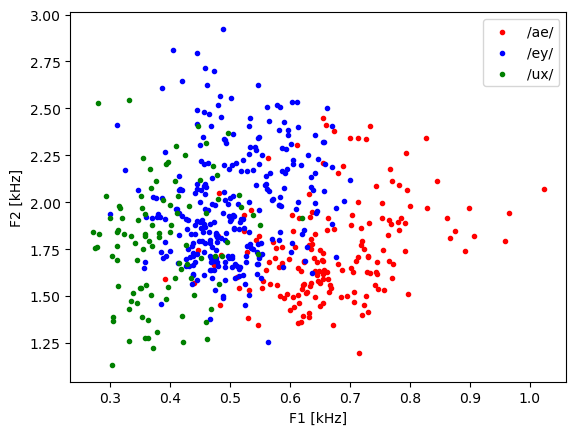

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Extracting vowels
aes = train[train["Phoneme"] == 'ae']
eys = train[train["Phoneme"] == 'ey']
uxs = train[train["Phoneme"] == 'ux']


# Plotting
plt.xlabel("F1 [kHz]")
plt.ylabel("F2 [kHz]")
plt.scatter(aes["F1"], aes["F2"],c="r", label="/ae/", marker='.')
plt.scatter(eys["F1"], eys["F2"],c="b", label="/ey/", marker='.')
plt.scatter(uxs["F1"], uxs["F2"],c="g", label="/ux/", marker='.')
plt.legend()
plt.show()




1a)

/ey/ and /ae/ would seeam fairly easy to classify with a linear method. /ey/ and /ux/ could be worse to classify because /ux/ is overlapping so much with /ey/. However I think we have methods that more or less without difficulty would be able to distinguish the two vowels without problem. 

(b) Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

In [2]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

#Feature vector x
features = ['F1', 'F2']

#Training data
training_data = train[train["Phoneme"].isin(["ae", "ey", "ux"])]
x_train = training_data[features]
y_train = training_data["Phoneme"]

#Test data
test_data = test[test["Phoneme"].isin(["ae", "ey", "ux"])]
x_test = test_data[features]
y_test = test_data["Phoneme"]

#Gaussian distribution of phonemes
clf = GaussianNB()
classifier = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

#Model parameters
mean_ae = np.array([np.mean(aes["F1"]), np.mean(aes["F2"])])
mean_ey = np.array([np.mean(eys["F1"]), np.mean(eys["F2"])])
mean_ux = np.array([np.mean(uxs["F1"]), np.mean(uxs["F2"])])

cov_ae = np.array(np.cov(aes["F1"], aes["F2"]))
cov_ey = np.array(np.cov(eys["F1"], eys["F2"]))
cov_ux = np.array(np.cov(uxs["F1"], uxs["F2"]))

mean = np.vstack((mean_ae, mean_ey, mean_ux)).flatten()
cov = np.vstack((cov_ae, cov_ey, cov_ux)).flatten()

(c) To visualize the classes models and the classifier created in (b), plot the contours for each Gaussian distribution in the model, that is the class conditional likelihoods $P(x|c)$, by using the following function.

In [3]:
import scipy.stats

def plotGaussian(mean, cov, color, ax):
    """ 
        Creates a contour plot for a bi-variate normal distribution
        
        mean: numpy array 2x1 with mean vector
        cov: numpy array 2x2 with covarince matrix
        color: name of color for the plot (see https://matplotlib.org/stable/gallery/color/named_colors.html)
        ax: axis handle where the plot is drawn (can for example be returned by plt.gca() or plt.subplots())
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x, y = np.mgrid[xlim[0]:xlim[1]:(xlim[1]-xlim[0])/500.0, ylim[0]:ylim[1]:(ylim[1]-ylim[0])/500.0]
    xy = np.dstack((x, y))
    mvn = scipy.stats.multivariate_normal(mean, cov)
    lik = mvn.pdf(xy)
    ax.contour(x,y,lik,colors=color)

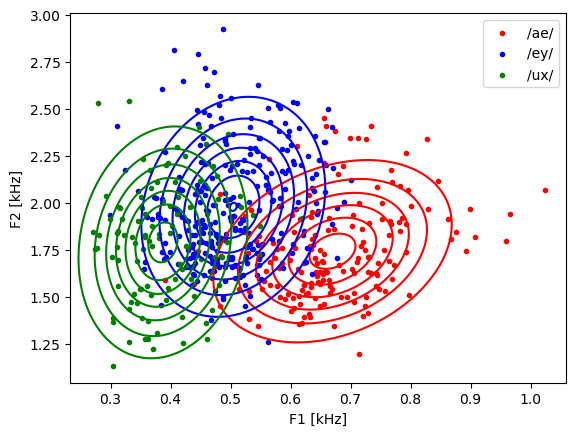

In [4]:
plt.xlabel("F1 [kHz]")
plt.ylabel("F2 [kHz]")
plt.scatter(aes["F1"], aes["F2"],c="r", label="/ae/", marker='.')
plt.scatter(eys["F1"], eys["F2"],c="b", label="/ey/", marker='.')
plt.scatter(uxs["F1"], uxs["F2"],c="g", label="/ux/", marker='.')
plt.legend()
plotGaussian(mean_ae, cov_ae, color='r', ax=plt.gca())
plotGaussian(mean_ey, cov_ey, color='b', ax=plt.gca())
plotGaussian(mean_ux, cov_ux, color='g', ax=plt.gca())
plt.show()    

*Try:* Plot the decision regions for the Bayesian classifier. Tips: Calculate the posterior for each class, use the `numpy.argmax` function to get the decision regions, and `matplotlib.pyplot.contourf` to plot them.

(d) Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_, that is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

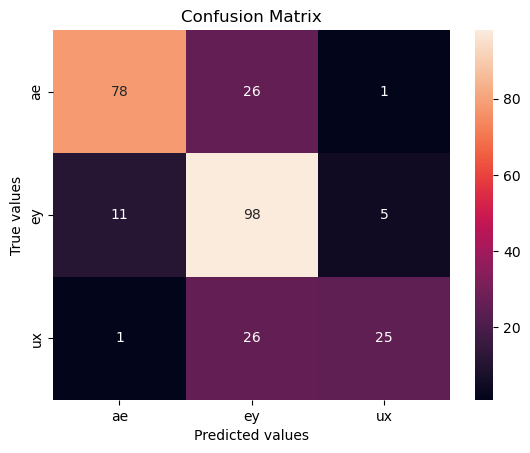

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

labels=["ae", "ey", "ux"]

fig = plt.figure()
ax = fig.add_subplot(111)
sn.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True values")
ax.set_xlabel("Predicted values")
plt.show()

(e) Extend your classifier to include the features "F1"-"F4" and compare the results with those in (d). Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

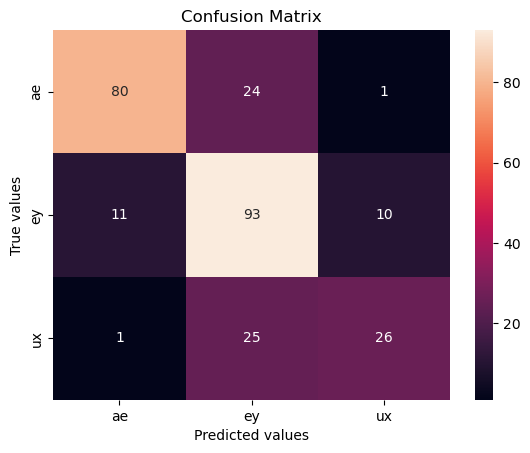

In [6]:
features2 = ['F1', 'F2', 'F3', 'F4']

#Training data
training_data2 = train[train["Phoneme"].isin(["ae", "ey", "ux"])]
x_train2 = training_data2[features2]
y_train2 = training_data2["Phoneme"]

#Test data
test_data2 = test[test["Phoneme"].isin(["ae", "ey", "ux"])]
x_test2 = test_data2[features2]
y_test2 = test_data2["Phoneme"]

#Gaussian distribution of phonemes
classifier2 = clf.fit(x_train2, y_train2)
y_pred2 = clf.predict(x_test2)

conf_matrix2 = confusion_matrix(y_true = y_test2, y_pred = y_pred2)

fig = plt.figure()
ax = fig.add_subplot(111)
sn.heatmap(conf_matrix2, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True values")
ax.set_xlabel("Predicted values")
plt.show()



1e)

Comparing the results in e) with the ones in d), we see that extending the number of formants do not affect the classification error that much. It improves slightly for /ae/ and worsens slightly for /ey/, for /ux/ it is still not able to distinguish /ey/ from /ux/.

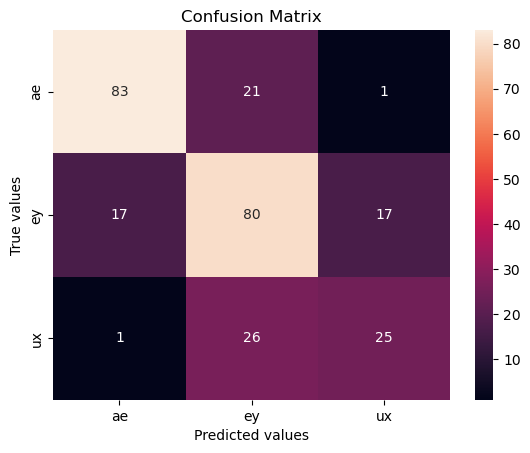

In [23]:
features3 = ['F1', 'F2', 'F3', 'F4', 'B1', 'B2', 'B3', 'B4']

#Training data
training_data3 = train[train["Phoneme"].isin(["ae", "ey", "ux"])]
x_train3 = training_data3[features3]
y_train3 = training_data3["Phoneme"]

#Test data
test_data3 = test[test["Phoneme"].isin(["ae", "ey", "ux"])]
x_test3 = test_data3[features3]
y_test3 = test_data3["Phoneme"]

#Gaussian distribution of phonemes
classifier3 = clf.fit(x_train3, y_train3)
y_pred3 = clf.predict(x_test3)

conf_matrix3 = confusion_matrix(y_true = y_test3, y_pred = y_pred3)

fig = plt.figure()
ax = fig.add_subplot(111)
sn.heatmap(conf_matrix3, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True values")
ax.set_xlabel("Predicted values")
plt.show()

1d) 

Adding B1-B4 made the model a bit worse at classifying. Where it got significantly worse at classifying /ey/, but stayed the same for /ae/. Classification of /ux/ is still not good. 

(f) We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in (e).

In [30]:
from scipy.stats import multivariate_normal
"""Not working"""

#columns = [3,4,5,6,7,8,9,10]

#Training data
train_ae = aes[aes.columns[columns]]
train_ey = eys[aes.columns[columns]]
train_ux = uxs[aes.columns[columns]]

train4 = np.vstack((train_ae, train_ey, train_ux))

#Phoneme and gender
aes_f = aes[aes["Gender"] == 'F' ]
aes_m = aes[aes["Gender"] == 'M' ]
eys_f = eys[eys["Gender"] == 'F' ]
eys_m = eys[eys["Gender"] == 'M' ]
uxs_f = uxs[uxs["Gender"] == 'F' ]
uxs_m = uxs[uxs["Gender"] == 'M' ]

#Model
train_model = np.array([[aes_f, aes_m], [eys_f, eys_m], [uxs_f, uxs_m]])


#Test data
test_aes = test[test["Phoneme"] == 'ae']
test_eys = test[test["Phoneme"] == 'ey']
test_uxs = test[test["Phoneme"] == 'ux']
    
test_ae = test_aes[test_aes.columns[columns]]
test_ey = test_eys[test_eys.columns[columns]]
test_ux = test_uxs[test_uxs.columns[columns]]

test4 = np.vstack((train_ae, train_ey, train_ux))


#Finding the prior
aes_f_prior = len(aes_f)/(len(aes_f)+len(aes_m))
aes_m_prior = len(aes_m)/(len(aes_f)+len(aes_m))

eys_f_prior = len(eys_f)/(len(eys_f)+len(eys_m))
eys_m_prior = len(eys_m)/(len(eys_f)+len(eys_m))

uxs_f_prior = len(uxs_f)/(len(uxs_f)+len(uxs_m))
uxs_m_prior = len(uxs_m)/(len(uxs_f)+len(uxs_m))


#Model parameters
mean_ae_f = aes_f.mean(axis=0)
mean_ae_m = aes_m.mean(axis=0)
mean_ey_f = eys_f.mean(axis=0)
mean_ey_m = eys_m.mean(axis=0)
mean_ux_f = uxs_f.mean(axis=0)
mean_ux_m = uxs_m.mean(axis=0)

cov_ae_f = aes_f.cov()
cov_ae_m = aes_m.cov()
cov_ey_f = eys_f.cov()
cov_ey_m = eys_m.cov()
cov_ux_f = uxs_f.cov()
cov_ux_m = uxs_m.cov()

#P(x|g,c)
ae_f_model = multivariate_normal(mean = mean_ae_f, cov = cov_ae_f)
ae_m_model = multivariate_normal(mean = mean_ae_m, cov = cov_ae_m)
ey_f_model = multivariate_normal(mean = mean_ey_f, cov = cov_ey_f)
ey_m_model = multivariate_normal(mean = mean_ey_m, cov = cov_ey_m)
ux_f_model = multivariate_normal(mean = mean_ux_f, cov = cov_ux_f)
ux_m_model = multivariate_normal(mean = mean_ux_m, cov = cov_ux_m)

#P(g)
p_g = 0.5

#P(x|c)
ae_pred = p_g*(ae_f_model.pdf(train4)+ae_m_model.pdf(train4))*aes_f_prior
ey_pred = p_g*(ey_f_model.pdf(train4)+ey_m_model.pdf(train4))*eys_f_prior
ux_pred = p_g*(ux_f_model.pdf(train4)+ux_m_model.pdf(train4))*uxs_f_prior

pred4 = np.stack((ae_pred, ey_pred, ux_pred))

conf_matrix3 = confusion_matrix(y_true = test4, y_pred = pred4)

fig = plt.figure()
ax = fig.add_subplot(111)
sn.heatmap(conf_matrix3, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True values")
ax.set_xlabel("Predicted values")
plt.show()

<ipython-input-30-cedbb047e689>:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_ae_f = aes_f.mean(axis=0)
<ipython-input-30-cedbb047e689>:46: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_ae_m = aes_m.mean(axis=0)
<ipython-input-30-cedbb047e689>:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_ey_f = eys_f.mean(axis=0)
<ipython-input-30-cedbb047e689>:48: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a 

ValueError: Found input variables with inconsistent numbers of samples: [556, 3]

(g) When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in (f) using only diagonal covariance matrices and compare the results.

In [ ]:
from scipy.stats import multivariate_normal
"""Not working"""

#columns = [3,4,5,6,7,8,9,10]

#Training data
train_ae = aes[aes.columns[columns]]
train_ey= eys[aes.columns[columns]]
train_ux = uxs[aes.columns[columns]]

train4 = np.vstack((train_ae, train_ey, train_ux))

#Phoneme and gender
aes_f = aes[aes["Gender"] == 'F' ]
aes_m = aes[aes["Gender"] == 'M' ]
eys_f = eys[eys["Gender"] == 'F' ]
eys_m = eys[eys["Gender"] == 'M' ]
uxs_f = uxs[uxs["Gender"] == 'F' ]
uxs_m = uxs[uxs["Gender"] == 'M' ]

#Model
train_model = np.array([[aes_f, aes_m], [eys_f, eys_m], [uxs_f, uxs_m]])


#Test data
test_aes = test[test["Phoneme"] == 'ae']
test_eys = test[test["Phoneme"] == 'ey']
test_uxs = test[test["Phoneme"] == 'ux']
    
test_ae = test_aes[test_aes.columns[columns]]
test_ey = test_eys[test_eys.columns[columns]]
test_ux = test_uxs[test_uxs.columns[columns]]

test4 = np.vstack((train_ae, train_ey, train_ux))


#Finding the prior
aes_f_prior = len(aes_f)/(len(aes_f)+len(aes_m))
aes_m_prior = len(aes_m)/(len(aes_f)+len(aes_m))

eys_f_prior = len(eys_f)/(len(eys_f)+len(eys_m))
eys_m_prior = len(eys_m)/(len(eys_f)+len(eys_m))

uxs_f_prior = len(uxs_f)/(len(uxs_f)+len(uxs_m))
uxs_m_prior = len(uxs_m)/(len(uxs_f)+len(uxs_m))


#Model parameters
mean_ae_f = aes_f.mean(axis=0)
mean_ae_m = aes_m.mean(axis=0)
mean_ey_f = eys_f.mean(axis=0)
mean_ey_m = eys_m.mean(axis=0)
mean_ux_f = uxs_f.mean(axis=0)
mean_ux_m = uxs_m.mean(axis=0)

cov_ae_f = aes_f.cov()
cov_ae_m = aes_m.cov()
cov_ey_f = eys_f.cov()
cov_ey_m = eys_m.cov()
cov_ux_f = uxs_f.cov()
cov_ux_m = uxs_m.cov()

ae_f_diag = np.diag(np.diag(cov_ae_f))
ae_m_diag = np.diag(np.diag(cov_ae_m))
ey_f_diag = np.diag(np.diag(cov_ey_f))
ey_m_diag = np.diag(np.diag(cov_ey_m))
ux_f_diag = np.diag(np.diag(cov_ux_f))
ux_m_diag = np.diag(np.diag(cov_ux_m))

#P(x|g,c)
ae_f_model = multivariate_normal(mean = mean_ae_f, cov = ae_f_diag)
ae_m_model = multivariate_normal(mean = mean_ae_m, cov = ae_m_diag)
ey_f_model = multivariate_normal(mean = mean_ey_f, cov = ey_f_diag)
ey_m_model = multivariate_normal(mean = mean_ey_m, cov = ey_m_diag)
ux_f_model = multivariate_normal(mean = mean_ux_f, cov = ux_f_diag)
ux_m_model = multivariate_normal(mean = mean_ux_m, cov = ux_m_diag)

#P(g)
p_g = 0.5

#P(x|c)
ae_pred = p_g*(ae_f_model.pdf(train4)+ae_m_model.pdf(train4))*aes_f_prior
ey_pred = p_g*(ey_f_model.pdf(train4)+ey_m_model.pdf(train4))*eys_f_prior
ux_pred = p_g*(ux_f_model.pdf(train4)+ux_m_model.pdf(train4))*uxs_f_prior

pred4 = np.stack((ae_pred, ey_pred, ux_pred))

conf_matrix3 = confusion_matrix(y_true = test4, y_pred = pred4)

fig = plt.figure()
ax = fig.add_subplot(111)
sn.heatmap(conf_matrix3, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True values")
ax.set_xlabel("Predicted values")
plt.show()

### Problem 2

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem. First you need to get your data on the format that `SVC` expects, which is a matrix where every row is a feature vector, and a list of integer labels corresponding to each row. We suggest using "ae" = 0, "ey" = 1 and "ux" = 2.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short, we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

You can use or adapt the following functions to visualize the SVM decision regions and support vectors in 2D.

In [41]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

def Plot_SVM_decision_regions(clf,data,labels):
    '''
    This function is for plotting the decision area of SVM
    
    Args:
    - clf: SVM model
    - data: Data with two features
    - labels: Corresponding labels of the data
    '''
    phonemes = np.array(["ae","ey","ux"])
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(phonemes)
    Z1 = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = label_encoder.transform(Z)
    Z2 = Z1.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    sns.scatterplot(data[:,0],data[:,1],hue=labels)
    plt.contourf(xx, yy, Z2, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Decision Area of SVM')
    plt.show()

def Plot_Support_Vectors(clf,data):
    '''
    This function is for plotting the support vectors of the SVM model
    
    Args:
    - clf: SVM model
    - data: Data with two features
    '''
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    Z1 = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = label_encoder.transform(Z)
    Z2 = Z1.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c='k',alpha=0.4,label='support vector')
    plt.contourf(xx, yy, Z2, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Support Vectors')
    plt.show()

(a) Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

In [1]:
from sklearn.svm import SVC
"""Not working"""

# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

#Feature vector x
features = ['F1', 'F2']

#Training data
training_data = train[train["Phoneme"].isin(["ae", "ey", "ux"])]
x_train = training_data[features]
y_train = training_data["Phoneme"]

#Test data
test_data = test[test["Phoneme"].isin(["ae", "ey", "ux"])]
x_test = test_data[features]
y_test = test_data["Phoneme"]

#Labels from str to int
y_test = []
for i in y_test:
    if i == 'ae':
        y_test.append('0')
    elif i == 'ey':
        y_test.append('1')
    elif i == 'ux':
        y_test.append('2')
y_train = []        
for i in y_train:
    if i == 'ae':
        y_train.append('0')
    elif i == 'ey':
        y_train.append('1')
    elif i == 'ux':
        y_train.append('2')

Cs = [0.1, 1, 10]

clf1 = SVC(Cs[0], kernel='linear')
clf2 = SVC(Cs[1], kernel='linear')
clf3 = SVC(Cs[2], kernel='linear')

clf1.fit(x_train, y_train)
pred1 = clf1.predict(x_test)

clf2.fit(x_train, y_train)
pred2 = clf2.predict(x_test)

clf3.fit(x_train, y_train)
pred3 = clf3.predict(x_test)

#Using premade functions
Plot_SVM_decision_regions(clf1,y_test,pred1)
Plot_Support_Vectors(clf1,data)
Plot_SVM_decision_regions(clf2,y_test,pred2)
Plot_Support_Vectors(clf2,data)
Plot_SVM_decision_regions(clf3,y_test,pred3)
Plot_Support_Vectors(clf3,data)

print("With larger values of C the SVM will allow smaller margines to be able to classify more points.\
      With smaller values C the classifyer will allow more misclassification to have a larger margin for the hyperplane.\
      Unfortuneately my code is not running, so I don't have plots to use as examples.")

NameError: name 'pd' is not defined

(b) Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?

In [2]:
from sklearn.svm import SVC
"""Not working"""
# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

#Feature vector x
features = ['F1', 'F2']

#Training data
training_data = train[train["Phoneme"].isin(["ae", "ey", "ux"])]
x_train = training_data[features]
y_train = training_data["Phoneme"]

#Test data
test_data = test[test["Phoneme"].isin(["ae", "ey", "ux"])]
x_test = test_data[features]
y_test = test_data["Phoneme"]

#Labels from str to int
y_test = []
for i in y_test:
    if i == 'ae':
        y_test.append('0')
    elif i == 'ey':
        y_test.append('1')
    elif i == 'ux':
        y_test.append('2')
y_train = []        
for i in y_train:
    if i == 'ae':
        y_train.append('0')
    elif i == 'ey':
        y_train.append('1')
    elif i == 'ux':
        y_train.append('2')

Cs = [0.1, 1, 10]

clf1 = SVC(Cs[0], kernel='sigmoid')
clf2 = SVC(Cs[1], kernel='sigmoid')
clf3 = SVC(Cs[2], kernel='sigmoid')

clf1.fit(x_train, y_train)
pred1 = clf1.predict(x_test)

clf2.fit(x_train, y_train)
pred2 = clf2.predict(x_test)

clf3.fit(x_train, y_train)
pred3 = clf3.predict(x_test)

#Using premade functions
Plot_SVM_decision_regions(clf1,y_test,pred1)
Plot_Support_Vectors(clf1,data)
Plot_SVM_decision_regions(clf2,y_test,pred2)
Plot_Support_Vectors(clf2,data)
Plot_SVM_decision_regions(clf3,y_test,pred3)
Plot_Support_Vectors(clf3,data)

NameError: name 'pd' is not defined